In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read load distribution factors

In [2]:
def add_load_weighted(hourly_load_zonal, load_ratio_zone, load_bus_zone, 
                      num_load_bus_tot, zone_ids, num_load_bus_zone):
    num_hours = hourly_load_zonal.shape[0]
    zone_load_bus = np.empty(len(zone_ids), dtype=object)
    load_bus_idx = np.zeros(num_load_bus_tot)
    load_bus_load = np.zeros((num_load_bus_tot, num_hours))
    n = 0
    for i, zone_id in enumerate(zone_ids):
        zone_load_tot = hourly_load_zonal[zone_id].values
        zone_load_bus[i] = np.outer(load_ratio_zone[i], zone_load_tot)
        load_bus_idx[n:n+num_load_bus_zone[i]] = load_bus_zone[i]
        load_bus_load[n:n+num_load_bus_zone[i], :] = zone_load_bus[i]
        n += num_load_bus_zone[i]

    bus_wload = pd.DataFrame(load_bus_load.T, columns=load_bus_idx,
                             index=hourly_load_zonal.index)
    bus_wload = bus_wload.sort_index(axis=1)
    bus_wload.columns = bus_wload.columns.astype(int)

    return bus_wload


In [3]:
# Read NYS bus table
filename = '/mnt/Bo_HDD/NYgrid-python/data/grid/npcc_new.csv'
bus_info = pd.read_csv(filename)
nys_bus = bus_info[~bus_info['zone'].isnull()]
nys_bus_wload = nys_bus[nys_bus['sumLoadP0'] > 0]
nys_bus_wload

,idx,name,Vn,vmax,vmin,v0,a0,xcoord,ycoord,area,zone,sumGenP0,sumGenQ0,sumLoadP0,sumLoadQ0
38,39,LEEDS,345.0,1.1,0.9,1.04100,0.057140,-74.001,42.042,2,G,0.00000,0.00000,1.00,0.000
40,41,ROTTERDAM,115.0,1.1,0.9,1.02634,-0.058833,-73.780,43.086,2,F,0.00000,0.00000,7.00,1.250
41,42,ALBANY,115.0,1.1,0.9,1.04000,-0.044794,-73.628,42.702,2,F,3.70000,1.34949,1.77,0.170
44,45,PORTER,115.0,1.1,0.9,1.04349,0.068892,-75.240,43.131,2,E,0.00000,0.00000,2.56,0.170
45,46,COLTON,115.0,1.1,0.9,1.04781,0.107949,-75.051,44.428,2,E,0.00000,0.00000,0.23,-0.425
46,47,MOSES W,230.0,1.1,0.9,1.03000,0.203842,-75.211,44.654,2,E,4.00000,-0.03268,5.28,1.000
48,49,PLATTSBURGH,115.0,1.1,0.9,0.96523,-0.019481,-74.134,44.699,2,D,0.00000,0.00000,2.08,0.170
50,51,CLAY,115.0,1.1,0.9,1.04000,0.148847,-76.261,42.939,2,C,1.41000,0.20685,7.31,0.750
51,52,ROCHESTER,345.0,1.1,0.9,1.04193,0.338821,-77.482,43.312,2,B,0.00000,0.00000,1.95,0.000
52,53,ROCHESTER,115.0,1.1,0.9,1.03000,0.314252,-77.777,42.889,2,B,8.33000,1.73977,7.28,2.500


In [4]:
# Load bus and ratio calculation
zone_ids = nys_bus['zone'].unique()
load_bus_zone = np.empty(11, dtype=object)
load_ratio_zone = np.empty(11, dtype=object)
num_load_bus_zone = np.zeros(11, dtype=int)

for i, zone_id in enumerate(zone_ids):
    load_bus_table = nys_bus_wload[nys_bus_wload['zone'] == zone_id]
    load_bus_zone[i] = load_bus_table['idx'].values
    if load_bus_table.shape[0] > 0:
        load_ratio_zone[i] = (load_bus_table['sumLoadP0'] / 
                              load_bus_table['sumLoadP0'].sum()).values
    else:
        load_bus_zone[i] = nys_bus[nys_bus['zone'] == zone_id]['idx'].values
        load_ratio_zone[i] = np.ones(len(load_bus_zone[i])) / len(load_bus_zone[i])
    num_load_bus_zone[i] = len(load_bus_zone[i])

num_load_bus_tot = sum(num_load_bus_zone)


# Calculate distributions

## 1. 2018 Baseline (historical data)

In [5]:
# Read load data
filename = '/mnt/Bo_HDD/NYgrid-python/data/from_nyiso/loadHourly_2018.csv'
zonal_demand_2018 = pd.read_csv(filename, index_col=0, parse_dates=True)
zonal_demand_2018 = zonal_demand_2018.pivot(columns='ZoneID', values='Load')

# Distribute load to buses
bus_demand_2018 = add_load_weighted(zonal_demand_2018, load_ratio_zone,
                                    load_bus_zone, num_load_bus_tot,
                                    zone_ids, num_load_bus_zone)

<Axes: xlabel='TimeStamp'>

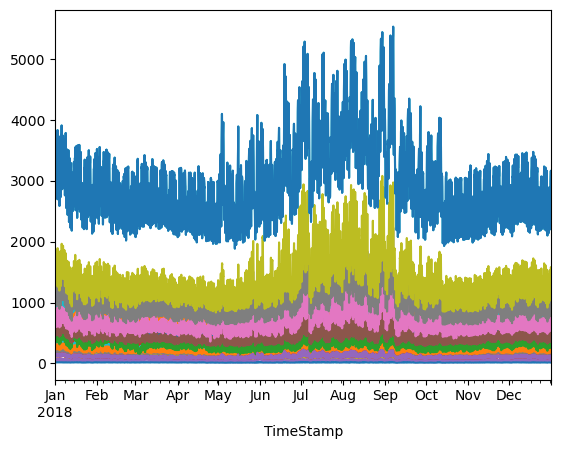

In [6]:
bus_demand_2018.plot(legend=False)

## 2. NYISO 2023-2042 Outlook

In [7]:
zone_name2id = {
    'WEST': 'A', 'GENESEE': 'B', 'CENTRAL': 'C', 'NORTH': 'D',
    'MOHAWK VALLEY': 'E', 'CAPITAL': 'F', 'HUDSON VALLEY': 'G',
    'MILLWOOD': 'H', 'DUNWOODIE': 'I', 'NYC': 'J', 'L ISLAND': 'K'
}

In [8]:
def process_load_2bus(zonal_load):

    # Rename 'Period' to 'Hour' and get TimeStamp from Year, Month, Day, Hour
    zonal_load = zonal_load.rename(columns={'Period': 'Hour'})
    # Set hour begins from 0
    zonal_load['Hour'] = zonal_load['Hour'] - 1
    zonal_load['TimeStamp'] = pd.to_datetime(
        zonal_load[['Year', 'Month', 'Day', 'Hour']])
    zonal_load = zonal_load.drop(
        columns=['Year', 'Month', 'Day', 'Hour'])
    zonal_load = zonal_load.set_index('TimeStamp')

    # Get data for model years: 2030 and 2040
    zonal_load_2030 = zonal_load[zonal_load.index.year==2030].copy()

    # Distribute load to buses
    bus_load_2030 = add_load_weighted(zonal_load_2030, load_ratio_zone,
                                            load_bus_zone, num_load_bus_tot,
                                            zone_ids, num_load_bus_zone)

    zonal_load_2040 = zonal_load[zonal_load.index.year==2040].copy()

    # Distribute load to buses
    bus_load_2040 = add_load_weighted(zonal_load_2040, load_ratio_zone,
                                            load_bus_zone, num_load_bus_tot,
                                            zone_ids, num_load_bus_zone)
    
    return bus_load_2030, bus_load_2040

### 2.1. Baseline

In [9]:
filename = '/mnt/Bo_HDD/NYgrid-python/data/renewable/2023-2042-System-Resource-Outlook-Forecasts.xlsx'
zonal_load_baseline = pd.read_excel(filename, sheet_name='Load_Baseline', header=1, usecols='A:O')
zonal_load_baseline = zonal_load_baseline.rename(columns=zone_name2id)

# Distribute load to buses
bus_load_baseline_2030, bus_load_baseline_2040 = process_load_2bus(zonal_load_baseline)

### 2.2 Lower Demand Policy

In [10]:
filename = '/mnt/Bo_HDD/NYgrid-python/data/renewable/2023-2042-System-Resource-Outlook-Forecasts.xlsx'
zonal_load_lower_demand = pd.read_excel(filename, sheet_name='Load_LowerDemandPolicy', header=1, usecols='A:O')
zonal_load_lower_demand = zonal_load_lower_demand.rename(columns=zone_name2id)

# Distribute load to buses
bus_load_lower_demand_2030, bus_load_lower_demand_2040 = process_load_2bus(zonal_load_lower_demand)

### 2.3. Higher Demand Policy

In [11]:
filename = '/mnt/Bo_HDD/NYgrid-python/data/renewable/2023-2042-System-Resource-Outlook-Forecasts.xlsx'
zonal_load_higher_demand = pd.read_excel(filename, sheet_name='Load_HigherDemandPolicy', header=1, usecols='A:O')
zonal_load_higher_demand = zonal_load_higher_demand.rename(columns=zone_name2id)

# Distribute load to buses
bus_load_higher_demand_2030, bus_load_higher_demand_2040 = process_load_2bus(zonal_load_higher_demand)

### 2.4. State Scenario Policy

In [12]:
filename = '/mnt/Bo_HDD/NYgrid-python/data/renewable/2023-2042-System-Resource-Outlook-Forecasts.xlsx'
zonal_load_state_scenario = pd.read_excel(filename, sheet_name='Load_StateScenario_Policy', header=1, usecols='A:O')
zonal_load_state_scenario = zonal_load_state_scenario.rename(columns=zone_name2id)

# Distribute load to buses
bus_load_state_scenario_2030, bus_load_state_scenario_2040 = process_load_2bus(zonal_load_state_scenario)

### Comparison

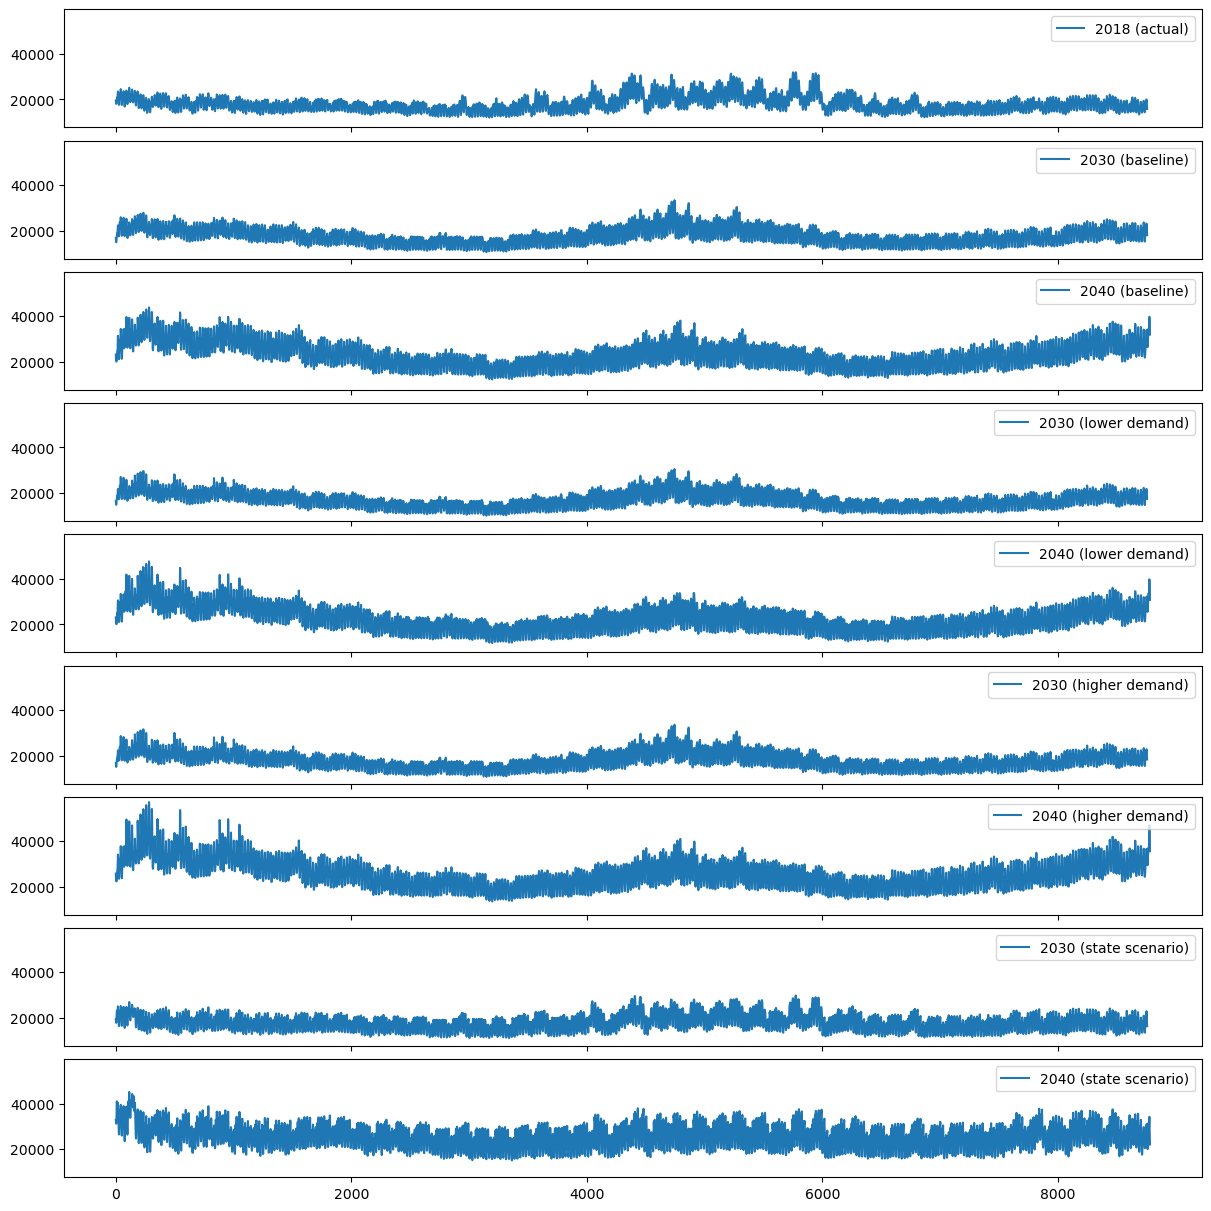

In [13]:
fig, axs = plt.subplots(9, figsize=(12, 12), layout='constrained',
                       sharex=True, sharey=True)
axs[0].plot(range(len(bus_demand_2018)), bus_demand_2018.sum(axis=1), label='2018 (actual)')
axs[1].plot(range(len(bus_load_baseline_2030)), bus_load_baseline_2030.sum(axis=1), label='2030 (baseline)')
axs[2].plot(range(len(bus_load_baseline_2040)), bus_load_baseline_2040.sum(axis=1), label='2040 (baseline)')
axs[3].plot(range(len(bus_load_lower_demand_2030)), bus_load_lower_demand_2030.sum(axis=1), label='2030 (lower demand)')
axs[4].plot(range(len(bus_load_lower_demand_2040)), bus_load_lower_demand_2040.sum(axis=1), label='2040 (lower demand)')
axs[5].plot(range(len(bus_load_higher_demand_2030)), bus_load_higher_demand_2030.sum(axis=1), label='2030 (higher demand)')
axs[6].plot(range(len(bus_load_higher_demand_2040)), bus_load_higher_demand_2040.sum(axis=1), label='2040 (higher demand)')
axs[7].plot(range(len(bus_load_state_scenario_2030)), bus_load_state_scenario_2030.sum(axis=1), label='2030 (state scenario)')
axs[8].plot(range(len(bus_load_state_scenario_2040)), bus_load_state_scenario_2040.sum(axis=1), label='2040 (state scenario)')

for ax in axs:
    ax.legend(loc='upper right')
plt.show()

# Save the data

In [14]:
output_dir = '/mnt/Bo_HDD/NYgrid-python/data/load/nyiso_2023-2042_outlook'
os.makedirs(output_dir, exist_ok=True)
bus_demand_2018.to_csv(f'{output_dir}/bus_demand_2018.csv')
bus_load_baseline_2030.to_csv(f'{output_dir}/bus_load_baseline_2030.csv')
bus_load_baseline_2040.to_csv(f'{output_dir}/bus_load_baseline_2040.csv')
bus_load_lower_demand_2030.to_csv(f'{output_dir}/bus_load_lower_demand_2030.csv')
bus_load_lower_demand_2040.to_csv(f'{output_dir}/bus_load_lower_demand_2040.csv')
bus_load_higher_demand_2030.to_csv(f'{output_dir}/bus_load_higher_demand_2030.csv')
bus_load_higher_demand_2040.to_csv(f'{output_dir}/bus_load_higher_demand_2040.csv')
bus_load_state_scenario_2030.to_csv(f'{output_dir}/bus_load_state_scenario_2030.csv')
bus_load_state_scenario_2040.to_csv(f'{output_dir}/bus_load_state_scenario_2040.csv')


In [15]:
# # Read load data: 2002-2020
# filename = '/media/by276/Bo_SSD/offshore_wind/Data/Demand/demand_base_zone.csv'
# zonal_demand = pd.read_csv(filename, index_col=0, parse_dates=True)

# # Distribute load to buses
# sample_hour_load = add_load_weighted(zonal_demand, load_ratio_zone,
#                                      load_bus_zone, num_load_bus_tot,
#                                      zone_ids, num_load_bus_zone)

# sample_hour_load.to_csv('/media/by276/Bo_SSD/offshore_wind/Data/Demand/demand_base_bus.csv')